In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']
import numpy as np
import pandas as pd


In [12]:
class weakClassifier:
    
    def __init__(self, feat, thresh, out, alpha=0):
        self.out = out
        self.feat = feat
        self.thresh = thresh
        self.alpha = alpha        

def weakLearner(wc, data):
    if (wc.out == 1):
        y = (data[:,wc.feat] >= wc.thresh)*1
    else:
        y = (data[:,wc.feat] < wc.thresh)*1
    
    out = np.where(y == 0)
    
    y[out[0]] = -1
    
    return y

def AdaBoost(n_wc, data, label):
    
    D_container = []
    D = np.ones(label.shape) / len(label) # Start with all equal weights to begin with
    wc_container = [0]*n_wc # Will hold weak classifiers
    alpha = np.zeros((n_wc,1)) # Weight of each weak learner
    err = [0]*n_wc
    
    nfeats = data.shape[1]
    nsamples = data.shape[0]
    
    # Find the min/max of the data ranges
    mn = np.min(data,0)
    mx = np.max(data,0)
        
    for i in xrange(n_wc):
        err[i] = np.inf;
       
        for out in [-1,1]: # all possible outcomes
            for feat in xrange(nfeats): # all possible dimensions
                
                # This gets the range of the data and creates 100 equally spaced thresholds to
                # test for.
                thresholds = np.linspace(mn[feat],mx[feat],100)
                
                for thr in thresholds: # 100 possible thresholds

                    # feat,thresh,out
                    wc = weakClassifier(feat,thr,out)

                    # The more wrong that are NOT equal to the label, the higher this is.
                    curr_err = sum(np.multiply(D,(weakLearner(wc,data) != label)));

                    # If the most recent error is the lowest, modify the wc
                    if ( curr_err < err[i]):
                        err[i] = curr_err;
                        wc_container[i] = wc;

        if(err[i] >= 0.5):
            print 'stop b/c err>1/2', err[i]
            break;

        alpha[i] = 0.5 * np.log((1-err[i])/err[i]);
        wc_container[i].alpha = alpha[i]

        # Update D so that wrongly classified samples will have more weight
        q = np.multiply(np.multiply(-alpha[i],label),weakLearner(wc_container[i], data))
        D = np.multiply(D,np.exp(q))

        # Normalize the weights
        D = D/sum(D);
        D_container.append(D)
        print min(D), max(D)
    
    return (wc_container,D_container)
        

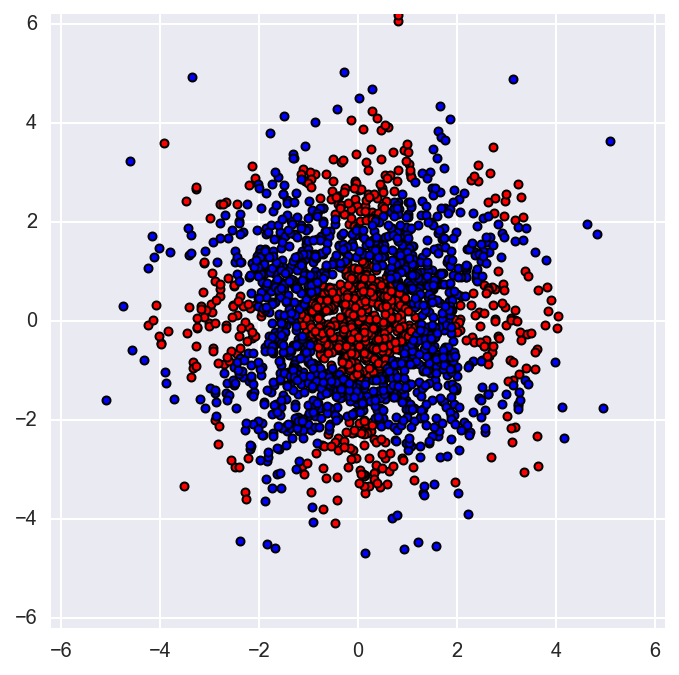

In [5]:
np.random.seed(42)
data = np.random.randn(2000,2) * np.pi/2

# Create 
outcome = ((np.power(np.sin(data[:,0]),2) + np.power(np.sin(data[:,1]),2)) < 0.9) * 1
outcome[np.where(outcome==0)] = -1

fig = plt.figure()
plt.plot(data[np.where(outcome == 1),0],data[np.where(outcome == 1),1],'ro',mec='k',mew=1.,ms=4, label='1')
plt.plot(data[np.where(outcome != 1),0],data[np.where(outcome == -1),1],'bo',mec='k',mew=1.,ms=4, label = '-1')
plt.axis('square')
plt.xlim([-6.2,6.2])
plt.ylim([-6.2,6.2])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

0.000411522633745 0.000636942675159
0.000333781209606 0.000830337739021
0.000409038268053 0.000727918485641
0.000343676806117 0.000917421958456
0.000275988320017 0.00121554463246
0.000330894854423 0.00107232300665
0.000279091167933 0.00125721405901
0.000233866226367 0.00155861909033
0.00029560907108 0.00128932271271
0.000243559273848 0.00115310549247
0.000221871170649 0.00138590353081
0.000263569759776 0.00119946928034
0.000219611588252 0.00148138733486
0.00019293922697 0.00168769492914
0.000225728431587 0.00153626073527
0.000194628877995 0.00177396908902
0.000174713660322 0.00216445113941
0.000199959007725 0.00198936574
0.000165444309376 0.00226563422487
0.000151332240037 0.00199706655531


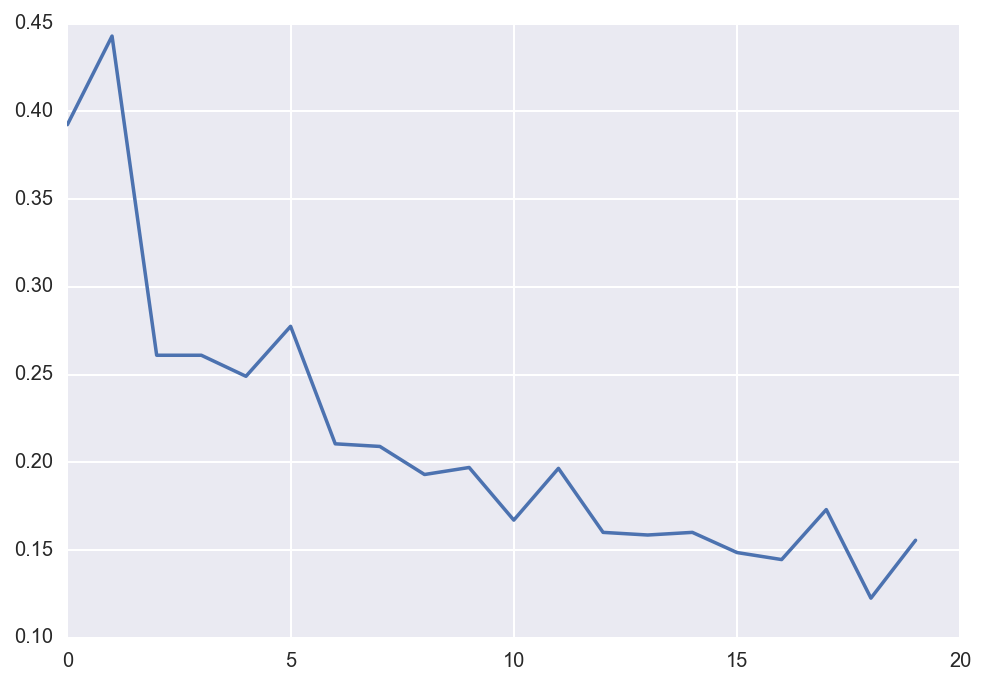

In [13]:
(wc_out,D) = AdaBoost(20, data, outcome)

wrong_predictions =[]
prediction = np.zeros(outcome.shape);
for t in xrange(len(wc_out)):
    prediction = prediction + wc_out[t].alpha*weakLearner(wc_out[t], data);
    bPrediction = np.sign(prediction);
    
    # Calculate the percentage of incorrect predictions
    wrong_predictions.append(sum(bPrediction != outcome)*1./data.shape[0]);
    
plt.plot(wrong_predictions)



In [27]:
df = pd.DataFrame()
print data.shape
df['x'] = data[:,0]
df['y'] = data[:,1]
for x in xrange(len(D)):
    df['D' + str(x)] = D[x]
    df['wc' + str(x)] = weakLearner(wc_out[x],data)
    
df.to_csv('pointWeights.csv')

(2000L, 2L)


In [32]:
print df.min()
print df.max()

x      -5.091371
y      -4.698465
D0      0.000412
wc0    -1.000000
D1      0.000334
wc1    -1.000000
D2      0.000409
wc2    -1.000000
D3      0.000344
wc3    -1.000000
D4      0.000276
wc4    -1.000000
D5      0.000331
wc5    -1.000000
D6      0.000279
wc6    -1.000000
D7      0.000234
wc7    -1.000000
D8      0.000296
wc8    -1.000000
D9      0.000244
wc9    -1.000000
D10     0.000222
wc10   -1.000000
D11     0.000264
wc11   -1.000000
D12     0.000220
wc12   -1.000000
D13     0.000193
wc13   -1.000000
D14     0.000226
wc14   -1.000000
D15     0.000195
wc15   -1.000000
D16     0.000175
wc16   -1.000000
D17     0.000200
wc17   -1.000000
D18     0.000165
wc18   -1.000000
D19     0.000151
wc19   -1.000000
dtype: float64
x       5.094239
y       6.167320
D0      0.000637
wc0     1.000000
D1      0.000830
wc1     1.000000
D2      0.000728
wc2     1.000000
D3      0.000917
wc3     1.000000
D4      0.001216
wc4     1.000000
D5      0.001072
wc5     1.000000
D6      0.001257
wc6     1.000000